# Análise dos dados de acervo das bibliotecas da UFRN

## 1. Introdução

Bibliotecas fornecem o suporte informacional para o desenvolvimento intelectual dos integrantes de uma comunidade acadêmica, contribuindo para a produtividade através da disponibilização de diversos materiais. De acordo com um estudo divulgado pela revista acadêmica College & Research Libraries, sob autoria de Krista M. Soria, Jan Fransen, and Shane Nackerud, alunos que usam os recursos das bibliotecas acadêmicas, pelo menos uma vez no primeiro ano de ensino superior, possuem uma maior probabilidade de se formarem ou permanecerem na instituição acadêmica após 4 anos.

Diante disso, tornou-se objetivo deste projeto analisar informações referentes ao acervo das bibliotecas da Universidade Federal do Rio Grande do Norte (UFRN), por meio de dados obtidos através do [Portal de Dados Abertos da UFRN](http://dados.ufrn.br/). O sistema de bibliotecas da UFRN é composto pela Biblioteca Central Zila Mamede (BCZM), a qual possui mais de 434.500 exemplares, e outras 21 bibliotecas setoriais. 

Para a realização deste trabalho, foram utilizados 48 arquivos .csv, os quais estão localizados na pasta "data" disponibilizada em conjunto com este notebook. Através desses arquivos, abaixo são criados 5 dataframes, os quais estarão disponibilizados dentro de um dicionário, sendo eles:

* dfs["discentes"]: composta por 10 arquivos, apresenta o detalhamento de suas colunas no arquivo "dicionario-discente.pdf", armazenando o nome de alunos ingressantes na UFRN, entre 2009 e 2018.

* dfs["emprestimos"]: composta por 35 arquivos, apresenta dados de empréstimos desde o primeiro semestre do ano 2000 até o segundo semestre de 2017. O detalhamento de suas colunas pode ser encontrado em "dicionario-emprestimo.pdf.

* dfs["cursos"]: composto pelo arquivo "cursos-ufrn.csv", apresenta dados referentes aos cursos ofertados pela UFRN. Seu detalhamento encontra-se em "dicionario-cursos-da-ufrn.pdf".

* dfs["exemplares"]: fornece dados referentes aos exemplares presente na UFRN, proveniente do arquivo "exemplares.csv", sendo seu detalhamento presente em "dicionario-exemplares.pdf".

* dfs["acervo-exemplares"]: apresenta informações a cerca dos materiais presentes no acervo das bibliotecas da UFRN. As informações referentes às suas colunas encontram-se no "dicionario-acervo-exemplares.pdf" e seus dados foram retirados do arquivo "exemplares-acervo.csv".

In [2]:
!pip install wordcloud

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [29]:
import re
import pandas as pd
from os import listdir
from os import listdir
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Junção dos datasets

In [7]:
# Variável com os dataframes que iremos usar
dfs = {
    'discentes': None,
    'emprestimos': None,
    'cursos': pd.read_csv('data/cursos-ufrn.csv', sep=';'),
    'exemplares': pd.read_csv('data/exemplares.csv', sep=';'),
    'acervo-exemplares': pd.read_csv('data/exemplares-acervo.csv', sep=";")
}

In [8]:
# Arquivos da pasta de datasets
files = listdir('data')
# Regex para cada tipo de dataset que possui vários arquivos
regex = {
    'discentes': re.compile(r'discentes-20[0-9]{2}'),
    'emprestimos': re.compile(r'emprestimos-20[0-9]{3}'),
}
# Filtros aplicados, lista de arquivos que satisfazem os regex
files_filter = {
    'discentes': list(filter(regex['discentes'].search, files)),
    'emprestimos': list(filter(regex['emprestimos'].search, files)),
}
# Mostra ambas as listas de arquivos
print(files_filter)

{'discentes': ['discentes-2009.csv', 'discentes-2010.csv', 'discentes-2011.csv', 'discentes-2012.csv', 'discentes-2013.csv', 'discentes-2014.csv', 'discentes-2015.csv', 'discentes-2016.csv', 'discentes-2017.csv', 'discentes-2018.csv'], 'emprestimos': ['emprestimos-20002.csv', 'emprestimos-20011.csv', 'emprestimos-20012.csv', 'emprestimos-20021.csv', 'emprestimos-20022.csv', 'emprestimos-20031.csv', 'emprestimos-20032.csv', 'emprestimos-20041.csv', 'emprestimos-20042.csv', 'emprestimos-20051.csv', 'emprestimos-20052.csv', 'emprestimos-20061.csv', 'emprestimos-20062.csv', 'emprestimos-20071.csv', 'emprestimos-20072.csv', 'emprestimos-20081.csv', 'emprestimos-20082.csv', 'emprestimos-20091.csv', 'emprestimos-20092.csv', 'emprestimos-20101.csv', 'emprestimos-20102.csv', 'emprestimos-20111.csv', 'emprestimos-20112.csv', 'emprestimos-20121.csv', 'emprestimos-20122.csv', 'emprestimos-20131.csv', 'emprestimos-20132.csv', 'emprestimos-20141.csv', 'emprestimos-20142.csv', 'emprestimos-20151.csv'

In [9]:
def make_df(filenames):
    '''Pega uma lista de arquivos e retorna um único dataframe gerado.'''
    # Lista de dataframes
    dfs = [pd.read_csv('data/'+filename, sep=';') for filename in filenames]
    # Concatena todos os dataframes em um só
    return pd.concat(dfs, ignore_index=True)

# Junta todos os dados de discentes em um unico dataframe
dfs['discentes'] = make_df(files_filter['discentes'])
# O mesmo para emprestimos
dfs['emprestimos'] = make_df(files_filter['emprestimos'])

In [10]:
dfs['emprestimos'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558703 entries, 0 to 2558702
Data columns (total 8 columns):
id_emprestimo           int64
codigo_barras           object
data_renovacao          object
data_emprestimo         object
data_devolucao          object
nome_usuario            object
id_vinculo_usuario      float64
tipo_vinculo_usuario    object
dtypes: float64(1), int64(1), object(6)
memory usage: 156.2+ MB


## 3. Organização do Dataset "acervo-exemplares"

Ao observar o Dataset "acervo-exemplares" é possível notar que algumas colunas como as titulo, sub_titulo e assunto) apresentam simbolos indesejados, símbolos esses utilizados indicar uma separação entre palavras. Abaixo, foi impresso as 5 primeiras linhas desse dataset para observar como ele está exposto.

In [11]:
dfs["acervo-exemplares"].head()

,registro_sistema,titulo,sub_titulo,assunto,autor,tipo_material,quantidade,ano,edicao,editora,isbn,issn
0,1,Nordeste: desenvolvimento sem justica /,NaN,Política social -#$&Região Nordeste (Br)#$&Soc...,"Ação Católica Operária, Recife.",Livro,3,1967,NaN,NaN,NaN,NaN
1,5,Manual de Psicologia/,NaN,Psicologia,"Adcock, C. J.",Livro,1,1965,NaN,"Zahar,",NaN,NaN
2,14,Statistical Abstract Of The United States /,NaN,Estatistica -#$&Estados Unidos.#$&Estatística.,Bureau Of Census.,Livro,1,1959.,NaN,"s.n.],",NaN,NaN
3,15,Verdade contra Freud /,NaN,Psicanálise (Psicologia).#$&Psicologia.,"Andrade, Almir de.",Livro,1,1933.,NaN,"Schmidt,",NaN,NaN
4,16,História de La Urss :,época del socialismo(1917-1957) /,Uniao Soviética -#$&História -#$&URSS.#$&1917-...,Academia de Ciências de La U.R.S.S.,Livro,1,1958.,NaN,"Editorial Grijalbo,",NaN,NaN


Para nos livrarmos destes simbolos indesejados, realizamos as instruções abaixo, substituindo-as por espaços quando necessário, ou apenas as retirando.

In [12]:
dfs["acervo-exemplares"]["titulo"] = dfs["acervo-exemplares"]["titulo"].str.replace("/", "")
dfs["acervo-exemplares"]["sub_titulo"] = dfs["acervo-exemplares"]["sub_titulo"].str.replace("/", "")
dfs["acervo-exemplares"]["assunto"] = dfs["acervo-exemplares"]["assunto"].str.replace("-", " ")
dfs["acervo-exemplares"]["assunto"] = dfs["acervo-exemplares"]["assunto"].str.replace("#", ", ")
dfs["acervo-exemplares"]["assunto"] = dfs["acervo-exemplares"]["assunto"].str.replace("&", "")
dfs["acervo-exemplares"]["assunto"] = dfs["acervo-exemplares"]["assunto"].str.replace("$", "")
dfs["acervo-exemplares"].head()

,registro_sistema,titulo,sub_titulo,assunto,autor,tipo_material,quantidade,ano,edicao,editora,isbn,issn
0,1,Nordeste: desenvolvimento sem justica,NaN,"Política social , Região Nordeste (Br), Socio...","Ação Católica Operária, Recife.",Livro,3,1967,NaN,NaN,NaN,NaN
1,5,Manual de Psicologia,NaN,Psicologia,"Adcock, C. J.",Livro,1,1965,NaN,"Zahar,",NaN,NaN
2,14,Statistical Abstract Of The United States,NaN,"Estatistica , Estados Unidos., Estatística.",Bureau Of Census.,Livro,1,1959.,NaN,"s.n.],",NaN,NaN
3,15,Verdade contra Freud,NaN,"Psicanálise (Psicologia)., Psicologia.","Andrade, Almir de.",Livro,1,1933.,NaN,"Schmidt,",NaN,NaN
4,16,História de La Urss :,época del socialismo(1917-1957),"Uniao Soviética , História , URSS., 1917 1957.",Academia de Ciências de La U.R.S.S.,Livro,1,1958.,NaN,"Editorial Grijalbo,",NaN,NaN


## 4. Vista dos datasets

Nesta sessão, são mostrados como os datasets estão dispostos após sua inserção, agrupamento ou modificação.

In [13]:
dfs["cursos"].head()

,id_curso,nome,id_coordenador,coordenador,situacao_curso,nivel_ensino,grau_academico,modalidade_educacao,area_conhecimento,tipo_oferta,...,municipio,campus,id_unidade_responsavel,unidade_responsavel,website,data_funcionamento,codigo_inep,dou,portaria_reconhecimento,convenio_academico
0,2000002,ADMINISTRAÇÃO,NaN,NaN,ATIVO,GRADUAÇÃO,BACHARELADO,Presencial,Ciências Sociais Aplicadas,Regular,...,NATAL,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,http://sol.ccsa.ufrn.br/ccsa/areas/adm/adminis...,1971-09-16,12311.0,2017-04-04,Portaria nº 272/2017 - MEC,NaN
1,2000004,ADMINISTRAÇÃO,24415.0,ANDREA CRISTINA SANTOS DE JESUS,ATIVO,GRADUAÇÃO,BACHARELADO,Presencial,Ciências Sociais Aplicadas,Regular,...,CURRAIS NOVOS,Campus Currais Novos,1482,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,NaN,1978-09-15,12355.0,2017-04-04,Portaria nº 272/2017 - MEC,NaN
2,92724368,ADMINISTRAÇÃO HOSPITALAR E SISTEMAS DE SAÚDE,24896.0,GABRIEL MARTINS DE ARAUJO FILHO,ATIVO,LATO SENSU,NaN,Presencial,NaN,NaN,...,NaN,NaN,161,DEPARTAMENTO DE CIÊNCIAS ADMINISTRATIVAS - DEPAD,NaN,NaN,NaN,NaN,NaN,NaN
3,126907290,"ADMINISTRAÇÃO HOTELEIRA, BARES E RESTAURANTES",5752271.0,FRANCISCO FRANSUALDO DE AZEVEDO,NaN,LATO SENSU,NaN,Presencial,NaN,NaN,...,NaN,NaN,4295,PROGRAMA DE PÓS-GRADUAÇÃO EM TURISMO,NaN,NaN,NaN,NaN,NaN,NaN
4,15315770,ADMINISTRAÇÃO PÚBLICA,23122.0,MATILDE MEDEIROS DE ARAÚJO,ATIVO,GRADUAÇÃO,BACHARELADO,A Distância,Ciências Sociais Aplicadas,Regular,...,NATAL,NaN,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,NaN,NaN,1151028.0,2014-04-11,Portaria nº 226/2014 - DIREG/MEC,NaN


In [14]:
dfs["discentes"].head()

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
0,2.009022e+09,Abdias Beserra Pereira Júnior,2009,1.0,VESTIBULAR,REGULAR,CANCELADO,G,GRADUAÇÃO,111635057.0,HISTÓRIA,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
1,2.009116e+09,ABDO FARRET NETO,2009,2.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,CONCLUÍDO,D,DOUTORADO,9300591.0,DOUTORADO EM DESENVOLVIMENTO E INOVAÇÃO TECNOL...,PRESENCIAL,4847.0,PROGRAMA DE PÓS-GRADUAÇÃO EM DESENVOLVIMENTO E...,441.0,CENTRO DE CIÊNCIAS DA SAÚDE
2,2.009048e+09,ABELARDO LOPES DE ALBUQUERQUE MACHADO NETO,2009,2.0,VESTIBULAR,REGULAR,CANCELADO,G,GRADUAÇÃO,2000121.0,ECOLOGIA,PRESENCIAL,440.0,CENTRO DE BIOCIÊNCIAS,440.0,CENTRO DE BIOCIÊNCIAS
3,2.009021e+09,ABELARDO MONTEIRO BEZERRA DE MELO NETO,2009,2.0,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,10426760.0,GESTÃO DE POLÍTICAS PÚBLICAS,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
4,2.009120e+09,ABIGAIL CALDAS BATISTA GONDIM,2009,2.0,ALUNO ESPECIAL POS-GRADUACAO,ESPECIAL,CANCELADO,E,MESTRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dfs["emprestimos"].head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,nome_usuario,id_vinculo_usuario,tipo_vinculo_usuario
0,19785,L002813_19/12/2016 12:52:08,NaN,2000-08-21 09:32:00,2000-08-21 09:32:00,Usuário de Migração,0.0,OUTROS
1,19786,L033818,NaN,2000-08-14 19:35:00,2000-08-14 19:37:00,Usuário de Migração,0.0,OUTROS
2,19787,L033820,NaN,2000-08-17 11:45:00,2000-08-17 11:45:00,Usuário de Migração,0.0,OUTROS
3,19788,L033820,NaN,2000-08-17 11:49:00,2000-08-17 11:50:00,Usuário de Migração,0.0,OUTROS
4,19789,L033820,NaN,2000-08-17 11:58:00,2000-08-17 12:15:00,Usuário de Migração,0.0,OUTROS


In [16]:
dfs["acervo-exemplares"].head()

,registro_sistema,titulo,sub_titulo,assunto,autor,tipo_material,quantidade,ano,edicao,editora,isbn,issn
0,1,Nordeste: desenvolvimento sem justica,NaN,"Política social , Região Nordeste (Br), Socio...","Ação Católica Operária, Recife.",Livro,3,1967,NaN,NaN,NaN,NaN
1,5,Manual de Psicologia,NaN,Psicologia,"Adcock, C. J.",Livro,1,1965,NaN,"Zahar,",NaN,NaN
2,14,Statistical Abstract Of The United States,NaN,"Estatistica , Estados Unidos., Estatística.",Bureau Of Census.,Livro,1,1959.,NaN,"s.n.],",NaN,NaN
3,15,Verdade contra Freud,NaN,"Psicanálise (Psicologia)., Psicologia.","Andrade, Almir de.",Livro,1,1933.,NaN,"Schmidt,",NaN,NaN
4,16,História de La Urss :,época del socialismo(1917-1957),"Uniao Soviética , História , URSS., 1917 1957.",Academia de Ciências de La U.R.S.S.,Livro,1,1958.,NaN,"Editorial Grijalbo,",NaN,NaN


In [17]:
dfs["exemplares"].head()

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
0,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,NÃO CIRCULA,304(812/814) A168n,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,304(812/814) A168n,1
2,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,304(812/814) A168n,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,159.9 A228m,5
4,9,L000040,Acervo de Desbaste,Biblioteca Central Zila Mamede,ESPECIAL,317.3 B79s,14


## 5. Curiosidades sobre os exemplares que compõem o acervo

Neste tópico, será abordado algumas curiosidades a cerca dos exemplares pertencentes a UFRN. Primeiramente, foi analisado em qual local se encontra a maior parte do acervo.

In [18]:
dfs["exemplares"]["biblioteca"].value_counts()

Biblioteca Central Zila Mamede                                                       290625
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­ CERES­-Caicó              33960
Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA             31813
Biblioteca Setorial do Centro Ciências da Saúde - CCS                                 26877
Biblioteca Setorial do Centro de Ensino Superior do Seridó - CERES Currais Novos      23752
Biblioteca Setorial Pe. Jaime Diniz - Escola de Música - EMUFRN                       23242
Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ         21899
Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA                       12213
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN            11052
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia       10979
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA        

Observa-se que dos 543473, cerca de 290625 materiais estão dispostos na Biblioteca Central Zila Mamede, o que indica que apenas uma biblioteca armazena 53% de todo o acervo da UFRN.

Tendo esta informação em mãos, agora será mostrado como é composta a coleção desse acervo.

In [19]:
dfs["exemplares"]["colecao"].value_counts()

Acervo Circulante                      437849
Acervo de Desbaste                      20639
Multimeios                              20278
Dissertações                            15462
Obras de Referência                      9129
Publicações da UFRN                      7780
Publicações de Autores do RN             5460
Monografias                              5328
Literatura de Cordel                     4495
Teses                                    4461
Folhetos                                 3684
Eventos                                  2958
Coleção Mossoroense                      2173
Coleção Zila Mamede                      1647
Obras Raras                              1115
Relatório Acadêmico                       536
Necessidades Educacionais Especiais       449
Periódicos de Referência                   26
Periódicos                                  4
Name: colecao, dtype: int64

É observado que em sua maioria, cerca de 83%, os exemplares que compõem este acervo são circulantes, ou seja, estâo em uso. Seguido pelos documentos com pouco uso que são retirados da coleção da biblioteca para permitir a atualização do acervo. Além disso, o número de dissertações é bem alto, com um total de 15462.

## 6. Mostragem dos livros mais emprestado

Analisando estes dataset, o grupo achou interessante determinar os livros mais emprestados, de forma a determinar se existe alguma relação entre eles. Para isto, inicialmente foi realizado um merge entre o dataset relacionado aos emprestimos e aos exemplares.

In [20]:
#Criação de um dataframe a partir da junção do dfs["emprestimos"] e dfs["exemplares"] a partir da coluna código de barras
result = dfs["emprestimos"]
result = result.merge(dfs["exemplares"], on = "codigo_barras", how = "outer")
result = result[result["registro_sistema"].isnull() == False]
result = result[result["data_emprestimo"].isnull() == False]
result["registro_sistema"] = result["registro_sistema"].astype(np.int64)
result.shape

(2303557, 14)

Como resultado, foi obtido o dataset "result" mostrado abaixo.

In [21]:
result.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,nome_usuario,id_vinculo_usuario,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
29,19816.0,L155645,NaN,2000-08-14 19:48:00,2000-08-14 19:49:00,Usuário de Migração,0.0,OUTROS,50765.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,657 C759 2.ed. v.1,19200
30,19817.0,L155645,NaN,2000-08-14 20:22:00,2000-08-14 20:24:00,Usuário de Migração,0.0,OUTROS,50765.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,657 C759 2.ed. v.1,19200
31,19818.0,L155645,NaN,2000-08-16 21:15:00,2000-08-16 21:19:00,Usuário de Migração,0.0,OUTROS,50765.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,657 C759 2.ed. v.1,19200
32,19819.0,L155645,NaN,2000-08-24 16:55:00,2000-08-24 16:56:00,Usuário de Migração,0.0,OUTROS,50765.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,657 C759 2.ed. v.1,19200
33,19820.0,L155645,NaN,2000-08-24 17:07:00,2000-08-24 17:07:00,Usuário de Migração,0.0,OUTROS,50765.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,657 C759 2.ed. v.1,19200


Com o merge feito, foi realizado a contagem do número de registro que mais apareceu, uma vez que este é o ponto determinante para encontrar o nome do livro. Foram recolhidos o número de registro dos dez livros mais emprestados.

In [22]:
 result["registro_sistema"].value_counts().head(10)

162354    20441
169092    14065
167086    13672
165526    13408
190272     9786
45093      9267
52119      7971
101841     7930
89936      7621
112811     6537
Name: registro_sistema, dtype: int64

In [23]:
#Realização da contagem e armazenamento do registro dos 10 que mais aparecem
registro_10 = result["registro_sistema"].value_counts().head(10).index.tolist()
print (registro_10)

[162354, 169092, 167086, 165526, 190272, 45093, 52119, 101841, 89936, 112811]


A partir do número de registro foram recolhidas as informações dos 10 livros mais emprestados, sendo essas informações armazenadas no dataset "mais_emprestados", printado abaixo.

In [24]:
#Criação de um dataframe com as informações dos 10 livros mais emprestados
#Criação de uma lista com os assuntos dos 10 livros mais emprestados, lista essa que será utilizada na criação do mapa de palavras
acervo_exemplares = dfs["acervo-exemplares"]
assuntos = []
mais_emprestados = acervo_exemplares[acervo_exemplares["registro_sistema"] == registro_10[0]]

for i in range(len(registro_10) - 1):
    aux_ = acervo_exemplares[acervo_exemplares["registro_sistema"] == registro_10[i+1]]
    assuntos.append(aux_.iloc[0]["assunto"])
    frames = [mais_emprestados, aux_]
    mais_emprestados = pd.concat(frames)
    
mais_emprestados

,registro_sistema,titulo,sub_titulo,assunto,autor,tipo_material,quantidade,ano,edicao,editora,isbn,issn
128528,162354,Fundamentos de física,NaN,"Física., Termodinâmica., Física moderna., Onda...","Halliday, David,",Livro,395,c2009.,8. ed. -,"LTC,",9788521616054#$&9788521616061#$&9788521616085,NaN
134817,169092,Física para cientistas e engenheiros,NaN,"Física., Mecânica., Oscilações., Ondas (Física...","Tipler, Paul Allen,",Livro,848,2009.,6. ed. -,"LTC,",9788521617105 (broch.)#$&97821617112 (broch.)#...,NaN
132936,167086,Cálculo,NaN,Cálculo.,"Thomas, George Brinton,",Livro,236,2009.,11. ed. -,"A. Wesley,",9788588639317 (v. 1 : broch.).#$&9788588639362...,NaN
131478,165526,Física,NaN,Física.,"Young, Hugh D.,",Livro,535,2008-2009.,12. ed. -,"Pearson Education do Brasil,",9788588639300 (broch. : v. 1).#$&9788588639331...,NaN
154666,190272,Fundamentos de física,NaN,"Física., Termodinâmica., Física moderna., Onda...","Halliday, David,",Livro,341,2012,9. ed. -,"LTC,",9788521619031 (broch.),NaN
36987,45093,Um curso de cálculo,NaN,Cálculo.,"Guidorizzi, Hamilton Luiz.",Livro,283,2001.,5.ed. -,"LTC,",9788521612599,NaN
43557,52119,Álgebra linear com aplicações,NaN,"Álgebra linear., Matemática., Informática.","Anton, Howard.",Livro,189,2001.,8. ed. -,"Bookman,",8573078472 (broch.),NaN
88124,101841,Histologia básica,NaN,Histologia.,"Junqueira, Luiz Carlos Uchoa,",CD-ROM,233,2008.,11. ed. -,"Guanabara Koogan,",9788527714020 : (Broch.).,NaN
77524,89936,Princípios de química :,questionando a vida moderna e o meio ambiente,"Química., Átomos., Moléculas., Termodinânica.,...","Atkins, P. W.",Livro,146,2006.,3. ed. -,"Bookman,",8536306688 (enc.)#$&07167-5701-X,NaN
97800,112811,Química :,a ciência central,Química.,NaN,Livro,137,2005.,9. ed. -,"Pearson Prentice Hall,",8587918427 (broch.)#$&9788587918420 (broch.),NaN


Um fato importante a ser analisado é que os sete livros mais emprestados são da área de exatas, além disso, entre os 10 mais emprestados, apenas um livro não é dessa área. Isso pode indicar uma maior procura dos cursos dessa área por livros em comparações com os cursos das demais áreas.

## 7. Análise dos Livros menos emprestados

Observando os que mais foram emprestados, foi visto que muitos livros foram emprestados apenas uma vez. Sendo assim, foi resolvido mostrar quais deles foram emprestados apenas uma vez. Para isto, foram feitos comparações utilizando a função 'value_counts()'.

In [25]:
#Armazenando em emprestimo_1 o resultado das comparações
emprestimo_1 = result["registro_sistema"].value_counts() == 1

In [26]:
#O número de False indica a quantidade de livros que foram emprestados mais de 1 vez
#True indica o número de livros que foram emprestados apenas 1 vez

emprestimo_1.value_counts()

False    66447
True     20736
Name: registro_sistema, dtype: int64

In [27]:
emprestimo_1.value_counts().sum()

87183

Esses números indicam que cerca de 23% dos livros emprestados, foram emprestados apenas uma vez. 

## 8. Nuvem de Palavras com os assuntos dos livros

Para analisar melhor os livros que temos a disposição, foi decidido criar uma nuvem de palavras para observar quais os assuntos mais aparentes entre os materiais didáticos disponíveis. Para isto, foi realizado um estudo sobre a coluna "assunto" sobre o dataset "acervo-exemplares". 

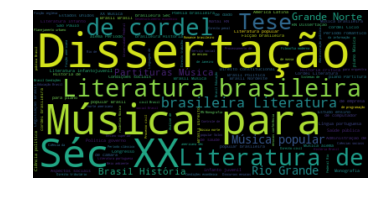

In [30]:
#Criação da nuvem de palavras sobre todos os livros disponíveis

wordcloud = WordCloud().generate(" ".join(str(i) for i in acervo_exemplares["assunto"]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Por meios das palavras mais destacatadas, podemos observar que:

* Dissertação: muitos dos matérias disponíveis na biblioteca são dissertações, sendo muitas delas trabalhos de conclusão do curso dos alunos
* Séc XX: por estarmos no inicio do século XXI, muitos dos livros tratam de assuntos referentes a assunto do século passado, além disso, pode ser visto que o acervo apresenta bastante livros da área de humanas que abordam esse período da história.
* Música para: é uma surpresa encontrar esse tópico tão abrangente, porém pode indicar a presença de livros relacionado a música.

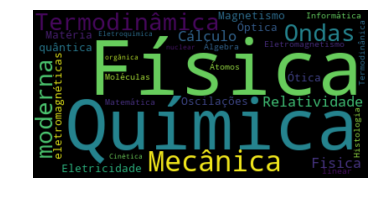

In [31]:
#Criação do mapa de palavras sobre os 10 livros mais emprestados

wordcloud2 = WordCloud().generate(" ".join(str(i) for i in assuntos))

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

Observando essa nuvem de palavras, pode-se observar que entre os principais temas, a área de exatas apresenta uma grande vantagem, não havendo muito visivelmente temas referentes a outras áreas.

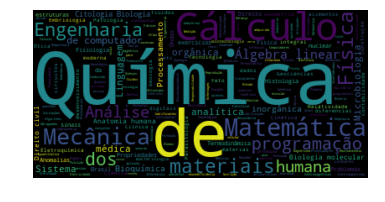

In [32]:
#Criação do mapa de palavras sobre os 100 livros mais emprestados

registro_100 = result["registro_sistema"].value_counts().head(100).index.tolist()
assuntos_100 = []
mais_emprestados_100 = acervo_exemplares[acervo_exemplares["registro_sistema"] == registro_100[0]]

for i in range(len(registro_100) - 1):
    aux_ = acervo_exemplares[acervo_exemplares["registro_sistema"] == registro_100[i+1]]
    assuntos_100.append(aux_.iloc[0]["assunto"])
    frames = [mais_emprestados_100, aux_]
    mais_emprestados_100 = pd.concat(frames)

wordcloud3 = WordCloud().generate(" ".join(str(i) for i in assuntos_100))

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

Olhando para esta nuvem, ainda é possível observar que a predominacia da área de exatas apesar de algumas palavras de outras áreas estarem mais aparente. Isso mostra a predominância da área de exatas em relação ao empréstimo de livros.

Comparando as três nuvens, observa-se que quando analisamos assuntos em gerais ocorre uma maior disponibilidade de livros da área de humanas, o que pode explicar o fato de que livros de exatas apresentam um maior número de emprestimos, uma vez que há uma maior variedade de livros dessa área de humanas, o que de certa forma, faz com que os interessados em livros de exatas peguem o mesmo título.

## 9. Distribuição de Empréstimos por Vínculo Institucional

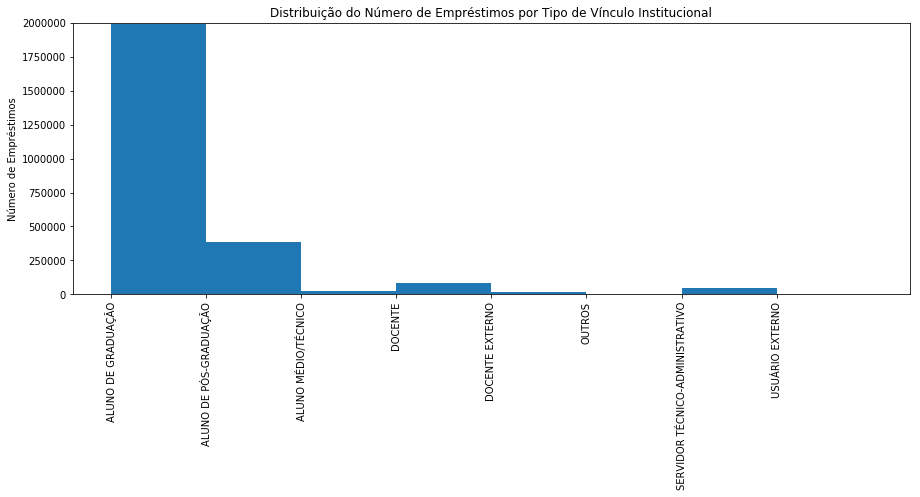

In [33]:
#Histograma de distribuição dos empréstimos pelo tipo de vínculo institucional
fig, ax = plt.subplots()
ax.hist(dfs["emprestimos"]["tipo_vinculo_usuario"], bins=8, range=(0,8))
ax.set_title("Distribuição do Número de Empréstimos por Tipo de Vínculo Institucional")
ax.set_ylim(0,2000000)
ax.set_ylabel("Número de Empréstimos")
plt.xticks(rotation=90)
fig.set_figheight(5)
fig.set_figwidth(15)
plt.show()

Como apresentado acima, tem-se que a maior quantidade de empréstimos é feita pelos alunos de graduação, seguido dos alunos de pós-graduação e os docentes da UFRN, enquanto que os demais vínculos apresentam números inferiores aos mencionados anteriormente.

## 10. Distribuição de Empréstimos por Discentes Ingressantes

In [34]:
#Renomeando em preparação para o merge entre o dataset "emprestimos" e o dataset "discentes"
emprestimos = dfs["emprestimos"].copy(deep=True)
discentes = dfs["discentes"].copy(deep=True)
emprestimos.rename(columns={'nome_usuario':'nome'}, inplace=True)
discentes.rename(columns={'nome_discente':'nome'}, inplace=True)
#Colunas selecionadas para o dataset 
columns = ["matricula", "nome","ano_ingresso","status","nome_curso",]
#Inner merge dos datasets
merge_discentes_emprestimos = discentes.merge(emprestimos, on="nome", how="inner")[columns]
#Conversão da coluna "ano_ingresso" para valores inteiros
merge_discentes_emprestimos["ano_ingresso"] = merge_discentes_emprestimos["ano_ingresso"].astype(np.int64)

Embora o ideal seja utilizar os IDs, foi-se decidido utilizar os nomes registrados, tendo-se a ressalva de que não é o método mais apropriado.


Para normalização dos dados usados, para a análise a seguir, considera-se apenas um dos empréstimos feitos pelo discente, sendo ele representado no segundo gráfico pelo ano em que ingressou na UFRN, com o intuito de comparar com o número de ingressantes por ano apresentados no primeiro gráfico.

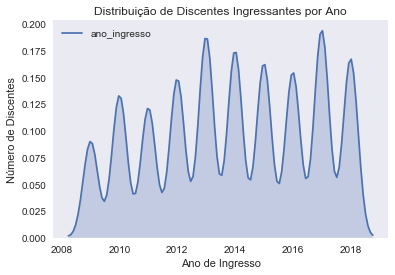

In [35]:
#Distribuição de Discentes Ingressantes por Ano
sns.set()
sns.set_style('dark')
sns.set_context("notebook")
sns.kdeplot(discentes["ano_ingresso"], shade=True)
plt.xlabel("Ano de Ingresso")
plt.ylabel("Número de Discentes")
plt.title("Distribuição de Discentes Ingressantes por Ano")
plt.show()

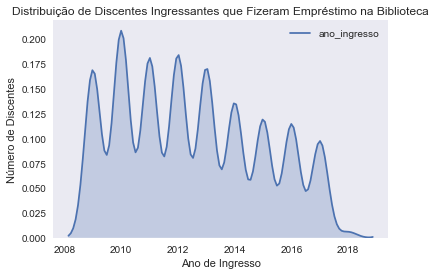

In [36]:
#Distribuição de discentes ingressantes que fizeram empréstimo na biblioteca
sns.set()
sns.set_style('dark')
sns.set_context("notebook")
sns.kdeplot(merge_discentes_emprestimos["ano_ingresso"][~merge_discentes_emprestimos["nome"].duplicated()], shade=True)
plt.xlabel("Ano de Ingresso")
plt.ylabel("Número de Discentes")
plt.title("Distribuição de Discentes Ingressantes que Fizeram Empréstimo na Biblioteca")
plt.show()

Diante dos gráficos de densidade, pode-se concluir que, embora os últimos anos tenham apresentado uma maior quantidade de alunos ingressantes, diante dos registros de empréstimos, tem-se que os ingressantes entre 2009 e 2013 apresentaram uma maior atividade na biblioteca, tendo pelo menos um registro de empréstimo, com destaque para os discentes ingressantes de 2010. Logo, pode-se concluir que a maior quantidade de discentes não implica diretamente em uma maior quantidade de registros como se é esperado.

## 11. Análise do mês com o maior número de emprestimos

Iremos realizar uma análise com o objetivo de descobrirmos os meses que mais ocorrem a realização de empréstimos de livros na UFRN. Para isso, iremos fazer uso da coluna **data_emprestimo**, que contêm a data em que o empréstimo foi realizado.

In [37]:
# Convertemos a coluna data_emprestimo de object para datetime
dfs['emprestimos']['data_emprestimo'] = pd.to_datetime(dfs['emprestimos']['data_emprestimo'])

# Coluna do mês do emprestimo
dfs['emprestimos']['mes_emprestimo'] = dfs['emprestimos']['data_emprestimo'].dt.month

# Contagem de emprestimos por mês
count_mes = dfs['emprestimos'].groupby('mes_emprestimo')['id_emprestimo'].count()

# Labels de cada mês
labels_mes = [
    'Janeiro', 'Fevereiro', 'Março', 'Abril',
    'Maio', 'Junho', 'Julho', 'Agosto',
    'Setembro', 'Outubro', 'Novembro', 'Dezembro'
]

A variável **count_mes** contêm a quantidade de empréstimos de cada mês: temos os meses usando **.keys()** e a quantidade de empréstimos usando **.values**. A variável **labels_mes** serve para termos o nome de cada mês e melhorar a nossa visualização na hora de constuirmos o gráfico.

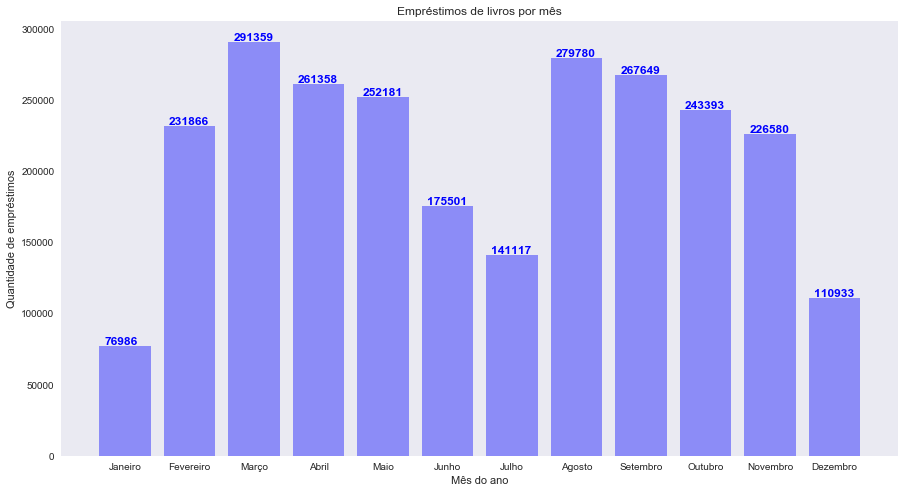

In [38]:
# Definimos o tamanho da figura que terá o gráfico
plt.figure(figsize=(15,8))

# Barras de cada mês com a quantidade de empréstimos
plt.bar(count_mes.keys(), count_mes.values, alpha=0.4, color='b')

# Labels com os valores de cada barra um pouco acima delas
for index, value in enumerate(count_mes):
    plt.text((index+0.68), (value+1000), str(value), color='blue', fontweight='bold')
    
# Demais configurações do gráfico
plt.xlabel('Mês do ano')
plt.ylabel('Quantidade de empréstimos')
plt.title('Empréstimos de livros por mês')
plt.xticks(list(count_mes.keys()), labels_mes)

# Exibindo o gráfico
plt.show()

Através do gráfico de barra apresentado anteriormente, podemos notar que os meses com maior quantidade de empréstimos de livros são: Março(291359 empréstimos) e Agosto(279780 empréstimos), que são inícios de período, ou seja, ainda na primeira unidade da disciplina. Portanto, podemos dizer que quem normalmente faz empréstimo de livro na UFRN, pega ainda no início das aulas.

## 12. Análise de Livros perdidos

Agora iremos analisar os livros perdidos pelos usuário que realizam o empréstimo. Para isso, iremos usar a coluna **data_devolucao** que contêm a data que o livro foi devolvido. Se essa coluna estiver vazia, signifaca que não houve devolução do livro.

In [39]:
# Pegamos os emprestimos que não tiveram devolução
df_devolucao_na = dfs['emprestimos'][dfs['emprestimos']['data_devolucao'].isna()]

# Agrupamos e verificamos o maior grupo
df_devolucao_na_group = df_devolucao_na.groupby('tipo_vinculo_usuario')['id_emprestimo'].count()

Na variável **df_devolucao_na_group** temos a quantidade de livros perdidos de cada mês: temos os meses usando **.keys()** e a quantidade de livros não devolvidos usando **.values**.

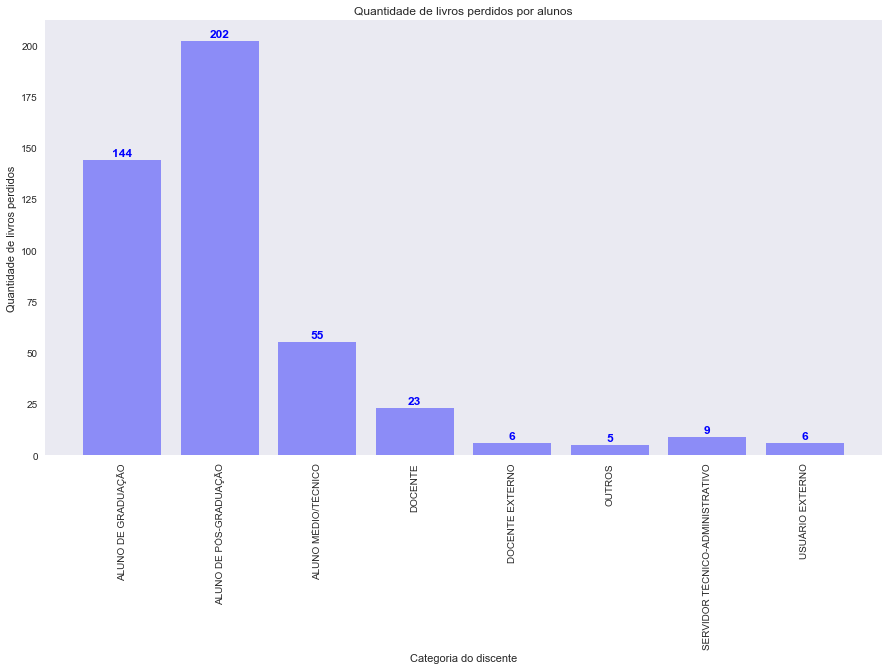

In [40]:
# Definimos o tamanho da figura que terá o gráfico
plt.figure(figsize=(15,8))

# Barra dos que possuem o auxílio
plt.bar(df_devolucao_na_group.keys(), df_devolucao_na_group.values, alpha=0.4, color='b')

# Valores
for index, value in enumerate(df_devolucao_na_group):
    plt.text((index-(len(str(value))*0.035)), (value+2), str(value), color='blue', fontweight='bold')
    
# Demais configurações do gráfico
plt.xlabel('Categoria do discente')
plt.ylabel('Quantidade de livros perdidos')
plt.title('Quantidade de livros perdidos por alunos')
plt.xticks(rotation=90)

# Exibimos todos os gráficos de uma só vez
plt.show()

Podemos ver que quem mais perde livros são os alunos de pós-graduação, seguidos dos alunos de graduação.

## 13. Livros mais emprestados para alunos de TI

O objetivo aqui é encontrar os livros mais alugados pelos alunos do curso de tecnologia da informação (TI). Para encontrar esses dados utilizaremos 3 _DataFrames_: **'acervo-exemplares', 'emprestimos' e 'discentes'**.

Abaixo é realizado o primeiro filtro, no _DataFrame_ **'discentes'**, onde se pega apenas os alunos do curso de **TECNOLOGIA DA INFORMAÇÃO**.

In [52]:
discentes_ti = dfs['discentes'][dfs['discentes'].nome_curso == 'TECNOLOGIA DA INFORMAÇÃO']
discentes_ti.head()

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
58154,2.013020e+09,ADEMIR BEZERRA DA SILVA JUNIOR,2013,1.0,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
58196,2.013056e+09,ADONIAS GALVÃO FILHO,2013,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
58577,2.013047e+09,ALESON BELO DA SILVA,2013,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
58681,2.013042e+09,ALEXANDRE TADEU DE FIGUEIREDO AZEVEDO,2013,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
58708,2.013051e+09,ALEXIS JORDÃO GONÇALVES PEREIRA,2013,1.0,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


Após pegar as informações apenas dos alunos de TI, é feito o primeiro merge entre informações. Primeiro, verifica-se os emprestimos já realizados pelos estudantes do curso, para isso, descobre-se que o ponto em comum entre o DataFrame 'emprestimos' e o que possue os alunos de TI é a coluna 'nome_discente' e 'nome_usuario'. Após, é feita uma mesclagem com 'exemplares' utilizando como ponto em comum a informação de 'codigo_barras', dessa forma foi obtido as informações dos livros, exceto o nome. Para adquirir o título do livro, é feita mais uma fundição com o 'acervo-exemplares', tendo a chave 'registro_sistema'.

In [53]:
#Para pegar os emprestimos realizados pelos discentes de TI
merged_by_nome_usuario = pd.merge(discentes_ti, dfs['emprestimos'], left_on='nome_discente', right_on='nome_usuario')

#Para pegar as informações dos livros alugados por alunos de TI
merged_by_codigo_barras = pd.merge(dfs['exemplares'], merged_by_nome_usuario, left_on='codigo_barras', right_on='codigo_barras')

#Para pegar nome dos livros
merged_by_registro_sistema = pd.merge(dfs['acervo-exemplares'], merged_by_codigo_barras, left_on='registro_sistema', right_on='registro_sistema')

top5_livros_alugados = merged_by_registro_sistema['titulo'].value_counts().head(5)

top5_livros_alugados

Cálculo                                   1393
Fundamentos de física                      576
Linguagem C                                487
Matemática discreta e suas aplicações      441
Física                                     402
Name: titulo, dtype: int64

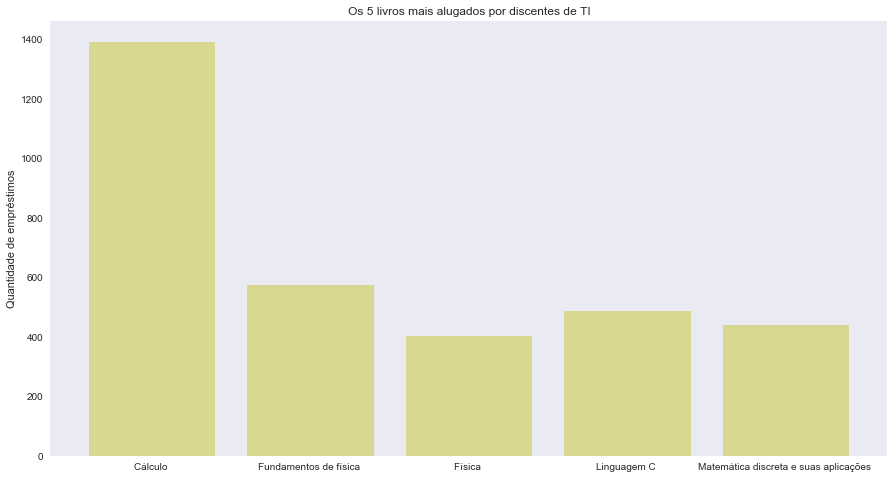

In [54]:
# Definimos o tamanho da figura que terá o gráfico
plt.figure(figsize=(15,8))

plt.bar(top5_livros_alugados.keys(), top5_livros_alugados.values, alpha=0.4, color='y')
    
# Demais configurações do gráfico
plt.ylabel('Quantidade de empréstimos')
plt.title('Os 5 livros mais alugados por discentes de TI')

# Exibindo o gráfico
plt.show()

## 14. Dados da Renovação de Empréstimo

In [41]:
dfs["emprestimos"].shape

(2558703, 9)

In [42]:
dfs["emprestimos"][dfs["emprestimos"]["data_renovacao"].isnull() == False].shape

(1021754, 9)

Considerando os dados acima, tem-se que, aproximadamente, 40% dos registros de empréstimos foram renovados pelos usuários, logo, 4 em cada 10 materiais foram renovados.

## 15. Distribuição de Materiais do Acervo por Tipo

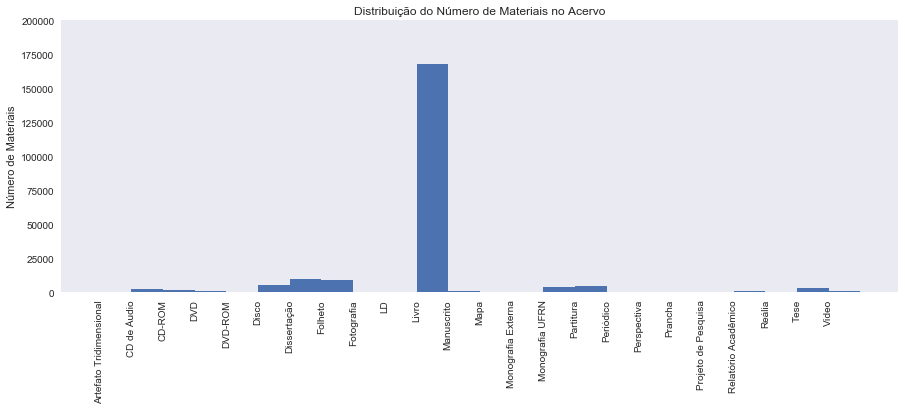

In [43]:
#Histograma da distribuição de materiais disponíveis no acervo pelo tipo 
fig, ax = plt.subplots()

ax.hist(dfs["acervo-exemplares"]["tipo_material"], bins=24, range=(0,24))
ax.set_title("Distribuição do Número de Materiais no Acervo")
ax.set_ylim(0,200000)
ax.set_ylabel("Número de Materiais")

fig.set_figheight(5)
fig.set_figwidth(15)
plt.xticks(rotation=90)
plt.show()

Diante do gráfico desenvolvido, tem-se que, dentre os materiais registrados no acervo das bibliotecas da UFRN, encontra-se em destaque quantitativamente, como esperado, os livros, seguido de dissertações, folhetos e discos, dentre os vários tipos de matériais disponíveis para uso dos integrantes da instituição.

## 16. Recomendações de Exemplares para a Biblioteca

In [44]:
#Outer merge entre o dataset "emprestimos" e o dataset "exemplares"
merged = dfs["emprestimos"].copy(deep=True)
merged = merged.merge(dfs["exemplares"], on="codigo_barras", how="outer")
#Retirando os que não possuem registro_sistema em preparação para outro merge
merged = merged[merged["registro_sistema"].isnull() == False]
#Conversão de dados para valores inteiros
merged["registro_sistema"] = merged["registro_sistema"].astype(np.int64)

In [45]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2601908 entries, 29 to 2859874
Data columns (total 15 columns):
id_emprestimo           float64
codigo_barras           object
data_renovacao          object
data_emprestimo         datetime64[ns]
data_devolucao          object
nome_usuario            object
id_vinculo_usuario      float64
tipo_vinculo_usuario    object
mes_emprestimo          float64
id_exemplar             float64
colecao                 object
biblioteca              object
status_material         object
localizacao             object
registro_sistema        int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(9)
memory usage: 317.6+ MB


In [46]:
#Colunas a serem levadas em consideração 
columns = ["id_emprestimo", "codigo_barras","nome_usuario", "id_vinculo_usuario", "tipo_vinculo_usuario", "id_exemplar", "colecao",
           "biblioteca", "status_material", "localizacao", "titulo", "autor", "tipo_material","quantidade","ano","edicao",
           "editora", "registro_sistema"]
#Inner merge com "acervo-exemplares"
merged_info = merged.merge(dfs["acervo-exemplares"], on="registro_sistema", how="inner")[columns]

In [47]:
#Frequência de empréstimos por exemplar
quantity = pd.DataFrame(merged_info["registro_sistema"].value_counts().reset_index())
quantity.columns = ["registro_sistema","quant_emprestimos"]

In [48]:
columns = ["registro_sistema", "quant_emprestimos", "colecao", "biblioteca", "status_material", "titulo", "autor",
           "tipo_material", "ano", "edicao", "editora"]
#Inner merge para pegar informações sobre os exemplares
quantity_info = quantity.merge(dfs["acervo-exemplares"], on="registro_sistema", how="inner")

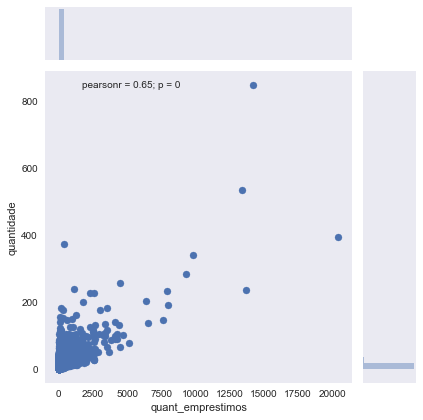

In [49]:
#Gráfico de correlação entre a quantidade de empréstimos e a quantidade de exemplares disponíveis no acervo da biblioteca
sns.jointplot(x=quantity_info['quant_emprestimos'], y=quantity_info['quantidade'])

Com base no gráfico de correlação entre a quantidade de empréstimos e a quantidade de exemplares disponíveis para cada título, embora tenham alguns que apresentem a característica de possuir uma maior quantidade de empréstimos sendo suprida por uma quantidade significativa de exemplares disponíveis, ao observar-se a distribuição do gráfico e o índice de correlação, tem-se que isso não se aplica a todos os títulos registrados no acervo. Diante disso, foi-se decidido apresentar como recomendação alguns títulos que apresentam uma alta demanda de empréstimos, mas que possuem menos de 10 exemplares disponíveis nas bibliotecas, com o objetivo de apresentar títulos que poderiam beneficiar, com uma maior disponibilização de exemplares, os integrantes da instituição diante da possível disputa pelo empréstimo.

In [50]:
#Recomendação de exemplares 
quantity_info[(quantity_info["quantidade"] < 10 ) & (quantity_info["quant_emprestimos"] > 500)]

,registro_sistema,quant_emprestimos,titulo,sub_titulo,assunto,autor,tipo_material,quantidade,ano,edicao,editora,isbn,issn
287,71288,815,Mecânica estática,NaN,"Mecânica., Estática, Dinâmica, Engenharia","Meriam, J.L",Livro,9,c2004.,5.ed.,"LTC,",8521614020,NaN
329,24061,738,Introdução à termodinâmica da engenharia química,NaN,"Engenharia química., Termodinâmica.","Smith, J. M.",Livro,9,c2000.,5. ed. -,"LTC,",8521611943 (broch.).,NaN
368,29415,679,Atlas de anatomia humana,NaN,"Anatomia humana , Atlas.","Netter, Frank H.",Livro,7,1999,2. ed. -,"Artmed,",8573075333,NaN
376,21931,675,Hidrologia :,ciência e aplicação,Hidrologia.,NaN,Livro,9,1997.,2.ed.-,"Editora da UFRS ;#$&ABRH,",8570252986 (broch.),NaN
393,29263,652,Fundamentos da biologia celular :,uma introdução à biologia molecular da célula,"Célula., Citologia., Biologia molecular., Biol...",NaN,Livro,8,1999.,NaN,"Artes Médicas ,",8573074949,NaN
410,58344,635,Tratado de infectologia,NaN,"Doenças transmissíveis., Doenças parasitárias....",NaN,Livro,8,2002.,2. ed. --,"Atheneu,",NaN,NaN
431,85552,610,Decifrando a terra,NaN,"Geociências , Estudo e ensino (Superior)., Ge...",NaN,Livro,9,2000.,NaN,"Oficina de textos,",8586238147 (broch.),NaN
433,70825,609,Endodontia :,biologia e técnica,"Endodontia., Doenças da polpa dentária., Cirur...","Lopes, Hélio Pereira.",Livro,9,c2004.,2. ed.,"MEDSI,",852770938,NaN
435,80718,608,Direito constitucional,NaN,Direito constitucional.,"Moraes, Alexandre de.",Livro,9,2006.,19. ed. atual. -,"Átlas,",8522442827,NaN
460,58789,577,Imunologia,NaN,Imunologia.,"Roitt, Ivan Maurice,",Livro,8,2003.,6. ed. --,"Manole,",8520414397 (broch.),NaN


## 17. Referências

Disponível em: <http://dados.ufrn.br/dataset/acervo-biblioteca>. Acesso em: 26/11/2018.

Disponível em: <http://dados.ufrn.br/dataset/discentes>. Acesso em: 26/11/2018.

Disponível em: <http://dados.ufrn.br/dataset/cursos-ufrn>. Acesso em: 26/11/2018.

Disponível em: <http://dados.ufrn.br/dataset/emprestimos-acervos-das-bibliotecas>. Acesso em: 28/11/2018.

Disponível em: <http://www.sisbi.ufrn.br/pagina.php?a=historico#.XASluWhKjIW>. Acesso em: 02/12/2018.

Disponível em: <http://sisbi.ufrn.br/bczm/pagina.php?a=historico#.XASuq2hKjIW>. Acesso em: 02/12/2018.

Disponível em: <https://crl.acrl.org/index.php/crl/article/view/16737/18250>. Acesso em: 02/12/2018.